In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve,roc_auc_score, auc
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn.metrics import accuracy_score , precision_score , recall_score ,  f1_score , precision_recall_curve , roc_auc_score,average_precision_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('creditcard.csv')

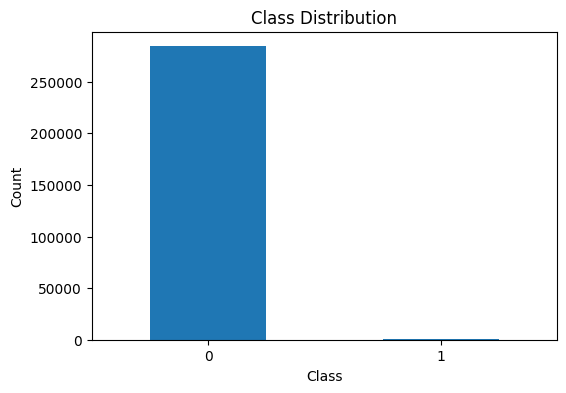

In [4]:
counts = data['Class'].value_counts()

plt.figure(figsize=(6,4))
counts.plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [5]:
data.duplicated().sum()

np.int64(1081)

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
X = data.drop(columns= ['Class'])
y = data['Class']

In [8]:
X_train , X_test , y_train , y_test = train_test_split(X,y,train_size=0.8 , stratify=y , random_state=42)

In [9]:
y_train.value_counts()

Class
0    226602
1       378
Name: count, dtype: int64

In [10]:
y_test.value_counts()

Class
0    56651
1       95
Name: count, dtype: int64

In [11]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(scale_pos_weight=14, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)
print(f"accuracy_score is : {accuracy_score(y_test, y_pred)} ")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"f1_score is : {f1_score(y_test, y_pred)}")

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

print("best threshold for max f1_score : \n")

# حساب F1 لكل threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

# أفضل threshold
best_threshold = thresholds[f1_scores.argmax()]
print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

print("best threshold for max recall : \n")
min_precision = .8
valid_idx = np.where(precisions[:-1] >= min_precision)[0]
best_threshold = thresholds[valid_idx][recalls[valid_idx].argmax()]

print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

accuracy_score is : 0.9994889507630493 
precision_score is : 0.9342105263157895
recall_score is : 0.7473684210526316
f1_score is : 0.8304093567251462
best threshold for max f1_score : 

best Threshold: 0.8428622
Precision (custom threshold): 0.9726027397260274
Recall (custom threshold): 0.7473684210526316
F1-score (custom threshold): 0.8452380952380952
best threshold for max recall : 

best Threshold: 0.03879853
Precision (custom threshold): 0.8020833333333334
Recall (custom threshold): 0.8105263157894737
F1-score (custom threshold): 0.806282722513089


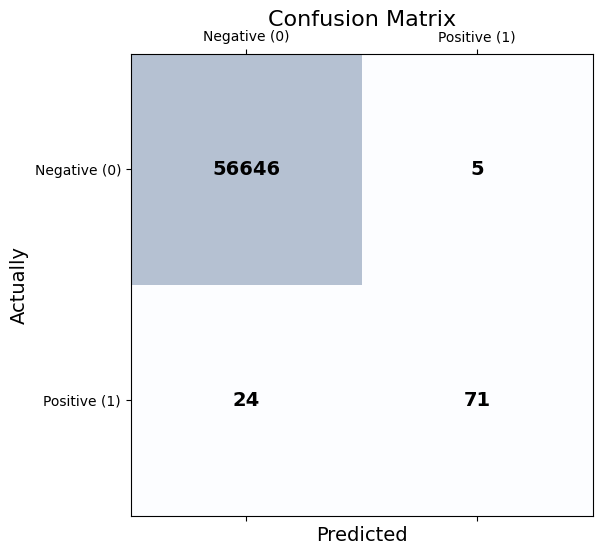

[[56646     5]
 [   24    71]]


In [12]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(6,6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center', fontsize=14, fontweight='bold')

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actually', fontsize=14)

ax.set_xticks([0,1])
ax.set_yticks([0,1])

ax.set_xticklabels(['Negative (0)', 'Positive (1)'])
ax.set_yticklabels(['Negative (0)', 'Positive (1)'])

plt.title("Confusion Matrix", fontsize=16, pad=20)

plt.show()
print(cm)

In [13]:
random_forest = RandomForestClassifier(n_estimators = 200 , random_state = 42 , n_jobs = -1)
random_forest.fit(X_train , y_train)
y_pred = random_forest.predict(X_test)
y_proba = random_forest.predict_proba(X_test)
print(f"accuracy_score is : {accuracy_score(y_test, y_pred)} ")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"f1_score is : {f1_score(y_test, y_pred)}")
print(f"The ROC score is : {roc_auc_score(y_test , y_proba[:,1])}")

print("*" * 30)

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

print("best threshold for max f1_score : \n")


f1_scores = 2 * (precisions * recalls) / (precisions + recalls)


best_threshold = thresholds[f1_scores.argmax()]
print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

print("best threshold for max recall : \n")
min_precision = .9
valid_idx = np.where(precisions[:-1] >= min_precision)[0]
best_threshold = thresholds[valid_idx][recalls[valid_idx].argmax()]

print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")



accuracy_score is : 0.9995065731505305 
precision_score is : 0.971830985915493
recall_score is : 0.7263157894736842
f1_score is : 0.8313253012048193
The ROC score is : 0.928361556306434
******************************
best threshold for max f1_score : 

best Threshold: 0.49
Precision (custom threshold): 0.9726027397260274
Recall (custom threshold): 0.7473684210526316
F1-score (custom threshold): 0.8452380952380952
best threshold for max recall : 

best Threshold: 0.27
Precision (custom threshold): 0.9012345679012346
Recall (custom threshold): 0.7684210526315789
F1-score (custom threshold): 0.8295454545454546


ROC AUC SCORE :  0.928361556306434


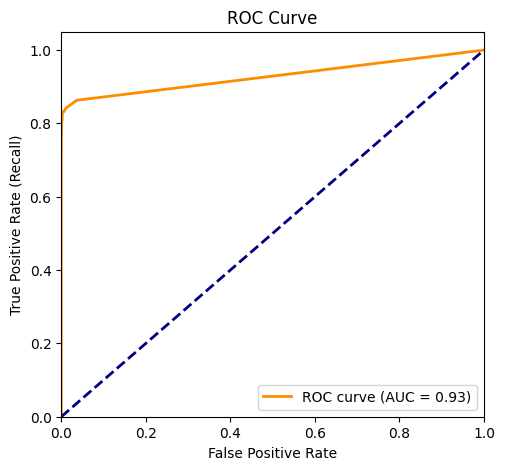

In [14]:
# ---------------- ROC Curve ----------------
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
print("ROC AUC SCORE : ",roc_auc)

## Random Over Sampler

In [15]:
ros = RandomOverSampler(random_state=42)
X_train_res , y_train_res = ros.fit_resample(X_train,y_train)

In [16]:
y_train_res.value_counts()

Class
0    226602
1    226602
Name: count, dtype: int64

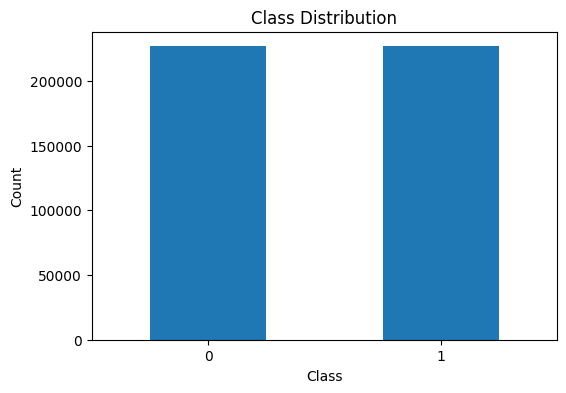

In [17]:
counts = y_train_res.value_counts()

plt.figure(figsize=(6,4))
counts.plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [18]:
X_train_res.duplicated().sum()

np.int64(226224)

In [19]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(scale_pos_weight=14, random_state=42)
xgb_model.fit(X_train_res, y_train_res)
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)
print(f"accuracy_score is : {accuracy_score(y_test, y_pred)} ")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"f1_score is : {f1_score(y_test, y_pred)}")


precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

print("best threshold for max f1_score : \n")

f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

best_threshold = thresholds[f1_scores.argmax()]
print("best Threshold:", best_threshold)

y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")



print("best threshold for max recall : \n")
min_precision = .9
valid_idx = np.where(precisions[:-1] >= min_precision)[0]
best_threshold = thresholds[valid_idx][recalls[valid_idx].argmax()]

print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

accuracy_score is : 0.9995065731505305 
precision_score is : 0.9036144578313253
recall_score is : 0.7894736842105263
f1_score is : 0.8426966292134831
best threshold for max f1_score : 

best Threshold: 0.5112026
Precision (custom threshold): 0.9036144578313253
Recall (custom threshold): 0.7894736842105263
F1-score (custom threshold): 0.8426966292134831
best threshold for max recall : 

best Threshold: 0.5112026
Precision (custom threshold): 0.9036144578313253
Recall (custom threshold): 0.7894736842105263
F1-score (custom threshold): 0.8426966292134831


with random over sampling :
1. higher recall (less FN)
2. higher f1-score

ROC AUC SCORE :  0.9723765734613316


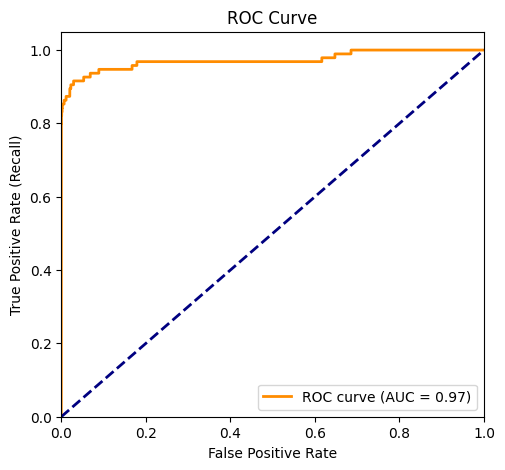

In [20]:
# ---------------- ROC Curve ----------------
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
print("ROC AUC SCORE : ",roc_auc)

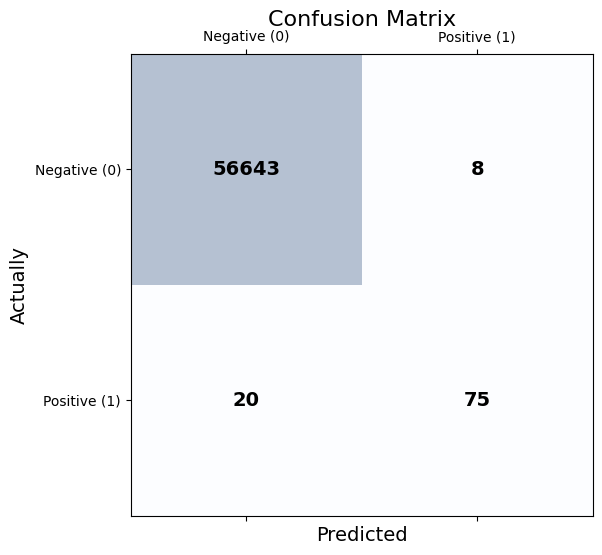

[[56643     8]
 [   20    75]]


In [21]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(6,6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center', fontsize=14, fontweight='bold')

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actually', fontsize=14)

ax.set_xticks([0,1])
ax.set_yticks([0,1])

ax.set_xticklabels(['Negative (0)', 'Positive (1)'])
ax.set_yticklabels(['Negative (0)', 'Positive (1)'])

plt.title("Confusion Matrix", fontsize=16, pad=20)

plt.show()
print(cm)

In [22]:
random_forest = RandomForestClassifier(n_estimators = 200 , random_state = 42 , n_jobs = -1)
random_forest.fit(X_train_res , y_train_res)
y_pred = random_forest.predict(X_test)
y_proba = random_forest.predict_proba(X_test)
print(f"accuracy_score is : {accuracy_score(y_test, y_pred)} and this is misleading in this case")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"f1_score is : {f1_score(y_test, y_pred)}")
print(f"The ROC score is : {roc_auc_score(y_test , y_proba[:,1])}")

print("*" * 30)

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

print("best threshold for max f1_score : \n")

f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

best_threshold = thresholds[f1_scores.argmax()]
print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

print("best threshold for max recall : \n")
min_precision = .9
valid_idx = np.where(precisions[:-1] >= min_precision)[0]
best_threshold = thresholds[valid_idx][recalls[valid_idx].argmax()]

print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

accuracy_score is : 0.9995065731505305 and this is misleading in this case
precision_score is : 0.971830985915493
recall_score is : 0.7263157894736842
f1_score is : 0.8313253012048193
The ROC score is : 0.9388862927118861
******************************
best threshold for max f1_score : 

best Threshold: 0.27
Precision (custom threshold): 0.9375
Recall (custom threshold): 0.7894736842105263
F1-score (custom threshold): 0.8571428571428571
best threshold for max recall : 

best Threshold: 0.215
Precision (custom threshold): 0.9047619047619048
Recall (custom threshold): 0.8
F1-score (custom threshold): 0.8491620111731844


best results until now

ROC AUC SCORE :  0.9388862927118861
XGB results : 

accuracy_score is : 0.9995065731505305 
precision_score is : 0.971830985915493
recall_score is : 0.7263157894736842
f1_score is : 0.8313253012048193


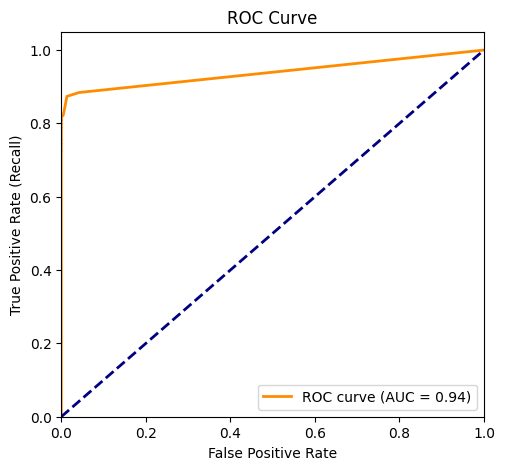

In [23]:
# ---------------- ROC Curve ----------------
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
print("ROC AUC SCORE : ",roc_auc)
print("XGB results : \n")
print(f"accuracy_score is : {accuracy_score(y_test, y_pred)} ")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"f1_score is : {f1_score(y_test, y_pred)}")

....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

## SMOTE

In [24]:
smote = SMOTE(k_neighbors=10,random_state=42)
x_train_sm , y_train_sm = smote.fit_resample(X_train,y_train)

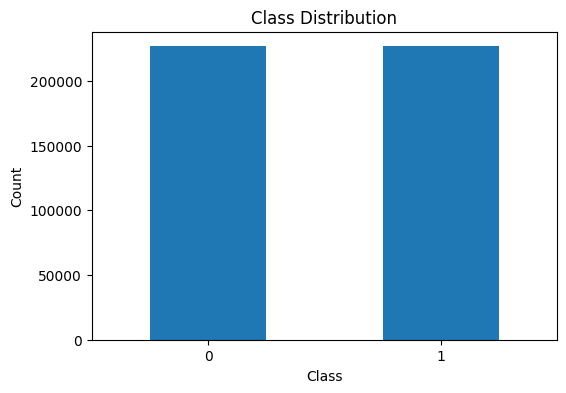

In [25]:
counts = y_train_sm.value_counts()
plt.figure(figsize=(6,4))
counts.plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

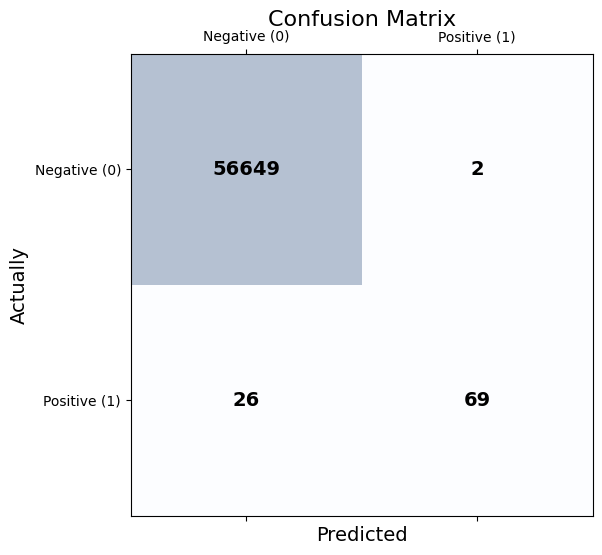

[[56649     2]
 [   26    69]]


In [26]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(6,6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center', fontsize=14, fontweight='bold')

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actually', fontsize=14)

ax.set_xticks([0,1])
ax.set_yticks([0,1])

ax.set_xticklabels(['Negative (0)', 'Positive (1)'])
ax.set_yticklabels(['Negative (0)', 'Positive (1)'])

plt.title("Confusion Matrix", fontsize=16, pad=20)

plt.show()
print(cm)

this may be better as recall is higher (less FN)

In [27]:

xgb_model = XGBClassifier(scale_pos_weight=14, random_state=42)
xgb_model.fit(x_train_sm, y_train_sm)
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)
print("XGB results : \n")
print(f"accuracy_score is : {accuracy_score(y_test, y_pred)} ")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"f1_score is : {f1_score(y_test, y_pred)}")

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

print("best threshold for max f1_score : \n")

f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

best_threshold = thresholds[f1_scores.argmax()]
print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

print("best threshold for max recall : \n")
min_precision = .9
valid_idx = np.where(precisions[:-1] >= min_precision)[0]
best_threshold = thresholds[valid_idx][recalls[valid_idx].argmax()]

print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

XGB results : 

accuracy_score is : 0.9990836358509851 
precision_score is : 0.6936936936936937
recall_score is : 0.8105263157894737
f1_score is : 0.7475728155339806
best threshold for max f1_score : 

best Threshold: 0.99640214
Precision (custom threshold): 0.9493670886075949
Recall (custom threshold): 0.7894736842105263
F1-score (custom threshold): 0.8620689655172413
best threshold for max recall : 

best Threshold: 0.9731271
Precision (custom threshold): 0.9036144578313253
Recall (custom threshold): 0.7894736842105263
F1-score (custom threshold): 0.8426966292134831


1. higher recall (less FN)
2. lower f1_score

recall is more important in fraud detection 
1. if the operation is fraud we can't miss it , even over a few false positives

In [28]:
from xgboost import XGBClassifier

In [29]:
smote = SMOTE(k_neighbors=3,random_state=42)
x_train_sm , y_train_sm = smote.fit_resample(X_train,y_train)


xgb_model = XGBClassifier(scale_pos_weight=14, random_state=42)
xgb_model.fit(x_train_sm, y_train_sm)
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)
print("XGB results : \n")
print(f"accuracy_score is : {accuracy_score(y_test, y_pred)} ")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"f1_score is : {f1_score(y_test, y_pred)}")
print(f"classification_report : {classification_report(y_test, y_pred)}")

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

print("best threshold for max f1_score : \n")

f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

best_threshold = thresholds[f1_scores.argmax()]
print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")
print(f"classification_report (custom threshold): {classification_report(y_test, y_pred_custom)}")

print("best threshold for max recall : \n")
min_precision = .9
valid_idx = np.where(precisions[:-1] >= min_precision)[0]
best_threshold = thresholds[valid_idx][recalls[valid_idx].argmax()]

print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

XGB results : 

accuracy_score is : 0.9993832164381631 
precision_score is : 0.8191489361702128
recall_score is : 0.8105263157894737
f1_score is : 0.8148148148148148
classification_report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.82      0.81      0.81        95

    accuracy                           1.00     56746
   macro avg       0.91      0.91      0.91     56746
weighted avg       1.00      1.00      1.00     56746

best threshold for max f1_score : 

best Threshold: 0.8500066
Precision (custom threshold): 0.926829268292683
Recall (custom threshold): 0.8
F1-score (custom threshold): 0.8587570621468926
classification_report (custom threshold):               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.93      0.80      0.86        95

    accuracy                           1.00     56746
   macro avg       0.96      0.90 

- best Threshold: 0.8500066
- Precision (custom threshold): 0.926829268292683
- Recall (custom threshold): 0.8
- F1-score (custom threshold): 0.8587570621468926
- best threshold for max recall : 

In [33]:
random_forest = RandomForestClassifier(n_estimators = 200 , random_state = 42 , n_jobs = -1)
random_forest.fit(x_train_sm , y_train_sm)
y_pred = random_forest.predict(X_test)
y_proba = random_forest.predict_proba(X_test)
print(f"accuracy_score is : {accuracy_score(y_test, y_pred)} and this is misleading in this case")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"f1_score is : {f1_score(y_test, y_pred)}")
print(f"The ROC score is : {roc_auc_score(y_test , y_proba[:,1])}")

print("*" * 30)


precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

print("best threshold for max f1_score : \n")


f1_scores = 2 * (precisions * recalls) / (precisions + recalls)


best_threshold = thresholds[f1_scores.argmax()]
print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

print("best threshold for max recall : \n")
min_precision = .8
valid_idx = np.where(precisions[:-1] >= min_precision)[0]
best_threshold = thresholds[valid_idx][recalls[valid_idx].argmax()]

print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

accuracy_score is : 0.9995418179254926 and this is misleading in this case
precision_score is : 0.9259259259259259
recall_score is : 0.7894736842105263
f1_score is : 0.8522727272727273
The ROC score is : 0.9628924653162624
******************************
best threshold for max f1_score : 

best Threshold: 0.42
Precision (custom threshold): 0.9166666666666666
Recall (custom threshold): 0.8105263157894737
F1-score (custom threshold): 0.8603351955307262
best threshold for max recall : 

best Threshold: 0.25
Precision (custom threshold): 0.8105263157894737
Recall (custom threshold): 0.8105263157894737
F1-score (custom threshold): 0.8105263157894737


ROC AUC SCORE :  0.9628924653162624


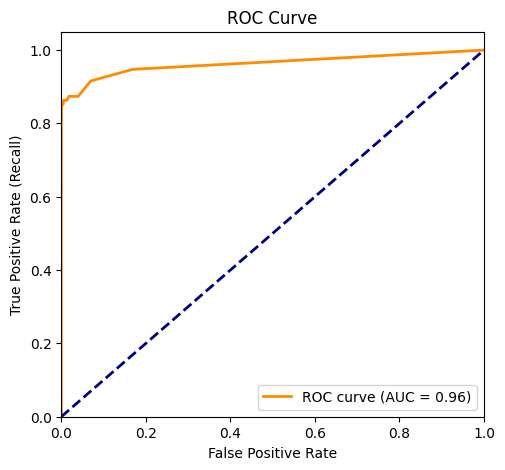

In [34]:
# ---------------- ROC Curve ----------------
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
print("ROC AUC SCORE : ",roc_auc)

.......................................................................................................................................................................................................................................................................................................................................................


## ADASYN

In [35]:
adasyn = ADASYN(random_state=42)
x_train_ad,y_train_ad = adasyn.fit_resample(X_train,y_train)

In [36]:
xgb_model = XGBClassifier(scale_pos_weight=14, random_state=42)
xgb_model.fit(x_train_ad, y_train_ad)
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)
print("XGB results : \n")
print(f"accuracy_score is : {accuracy_score(y_test, y_pred)} ")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"f1_score is : {f1_score(y_test, y_pred)}")

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

print("best threshold for max f1_score : \n")

# حساب F1 لكل threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

# أفضل threshold
best_threshold = thresholds[f1_scores.argmax()]
print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

print("best threshold for max recall : \n")
min_precision = .9
valid_idx = np.where(precisions[:-1] >= min_precision)[0]
best_threshold = thresholds[valid_idx][recalls[valid_idx].argmax()]

print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

XGB results : 

accuracy_score is : 0.9992422373383146 
precision_score is : 0.75
recall_score is : 0.8210526315789474
f1_score is : 0.7839195979899497
best threshold for max f1_score : 

best Threshold: 0.9720967
Precision (custom threshold): 0.9382716049382716
Recall (custom threshold): 0.8
F1-score (custom threshold): 0.8636363636363636
best threshold for max recall : 

best Threshold: 0.95602566
Precision (custom threshold): 0.9047619047619048
Recall (custom threshold): 0.8
F1-score (custom threshold): 0.8491620111731844


Best Results

ROC AUC SCORE :  0.9665420501705271


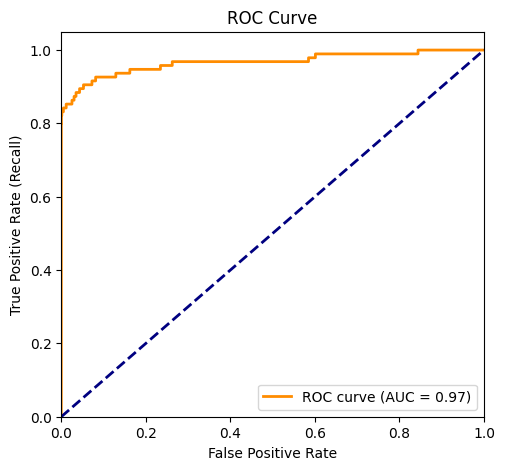

In [37]:
# ---------------- ROC Curve ----------------
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
print("ROC AUC SCORE : ",roc_auc)

In [38]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

# حساب F1 لكل threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

# أفضل threshold
best_threshold = thresholds[f1_scores.argmax()]
print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

best Threshold: 0.9720967
Precision (custom threshold): 0.9382716049382716
Recall (custom threshold): 0.8
F1-score (custom threshold): 0.8636363636363636


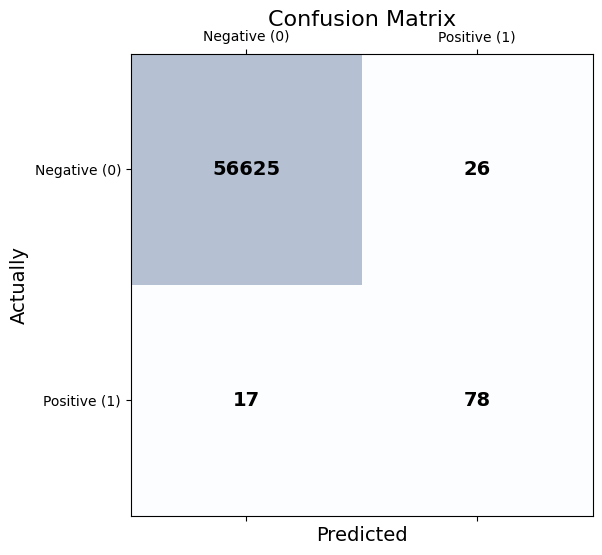

[[56625    26]
 [   17    78]]


In [39]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(6,6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center', fontsize=14, fontweight='bold')

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actually', fontsize=14)

ax.set_xticks([0,1])
ax.set_yticks([0,1])

ax.set_xticklabels(['Negative (0)', 'Positive (1)'])
ax.set_yticklabels(['Negative (0)', 'Positive (1)'])

plt.title("Confusion Matrix", fontsize=16, pad=20)

plt.show()
print(cm)

In [40]:
random_forest = RandomForestClassifier(n_estimators = 200 , random_state = 42 , n_jobs = -1)
random_forest.fit(x_train_ad , y_train_ad)
y_pred = random_forest.predict(X_test)
y_proba = random_forest.predict_proba(X_test)
print(f"accuracy_score is : {accuracy_score(y_test, y_pred)} ")
print(f"precision_score is : {precision_score(y_test, y_pred)}")
print(f"recall_score is : {recall_score(y_test, y_pred)}")
print(f"f1_score is : {f1_score(y_test, y_pred)}")
print(f"The ROC score is : {roc_auc_score(y_test , y_proba[:,1])}")

print("*" * 30)

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba[:,1])

print("best threshold for max f1_score : \n")

f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

best_threshold = thresholds[f1_scores.argmax()]
print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")

print("best threshold for max recall : \n")
min_precision = .9
valid_idx = np.where(precisions[:-1] >= min_precision)[0]
best_threshold = thresholds[valid_idx][recalls[valid_idx].argmax()]

print("best Threshold:", best_threshold)
y_pred_custom = (y_proba[:,1] >= best_threshold).astype(int)
print(f"Precision (custom threshold): {precision_score(y_test, y_pred_custom)}")
print(f"Recall (custom threshold): {recall_score(y_test, y_pred_custom)}")
print(f"F1-score (custom threshold): {f1_score(y_test, y_pred_custom)}")


accuracy_score is : 0.9995418179254926 
precision_score is : 0.9156626506024096
recall_score is : 0.8
f1_score is : 0.8539325842696629
The ROC score is : 0.9620277061119373
******************************
best threshold for max f1_score : 

best Threshold: 0.49
Precision (custom threshold): 0.9166666666666666
Recall (custom threshold): 0.8105263157894737
F1-score (custom threshold): 0.8603351955307262
best threshold for max recall : 

best Threshold: 0.475
Precision (custom threshold): 0.9058823529411765
Recall (custom threshold): 0.8105263157894737
F1-score (custom threshold): 0.8555555555555555


ROC AUC SCORE :  0.9620277061119373


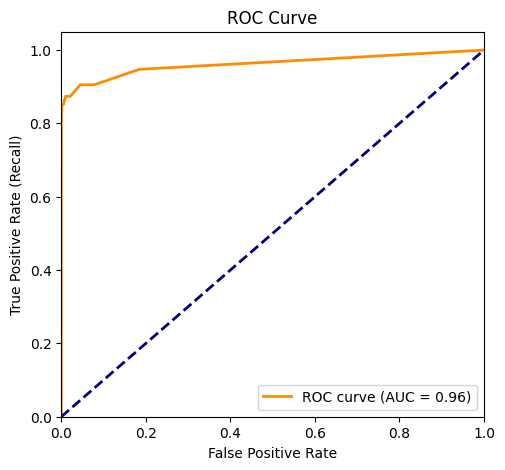

In [41]:
# ---------------- ROC Curve ----------------
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
print("ROC AUC SCORE : ",roc_auc)

## BEST RESULTS FROM THIS :

smote = SMOTE(k_neighbors=3,random_state=42)

- accuracy_score is : 0.9993832164381631 
- precision_score is : 0.8191489361702128
- recall_score is : 0.8105263157894737
- f1_score is : 0.8148148148148148

### best threshold for max f1_score : 

- best Threshold: 0.8500066
- Precision (custom threshold): 0.926829268292683
- Recall (custom threshold): 0.8
- F1-score (custom threshold): 0.8587570621468926

### best threshold for max recall : 

- best Threshold: 0.77079105
- Precision (custom threshold): 0.9047619047619048
- Recall (custom threshold): 0.8
- F1-score (custom threshold): 0.8491620111731844